In [1]:
from ctypes import * 
import numpy as np
import matplotlib.pyplot as plt

mysim = CDLL("F:\git_workspace\Multi-Particle-BeamLine-Simulation\Main_for_simulation\simulation_for_python.dll")

In [8]:
# 定义参数和返回值的类型
mysim.init_beam.argtypes = [c_int, c_double, c_double, c_double]
mysim.set_beamTwiss.argtypes = [c_double, c_double, c_double, c_double, c_double, c_double, c_double, c_double, c_double, c_double, c_double, c_double, c_uint]

mysim.init_database.argtypes = [c_char_p]
mysim.init_spacecharge.argtypes = [c_uint, c_uint, c_int]

mysim.simulate_and_getEnvelope.restype = POINTER(POINTER(c_double))

In [9]:
str = b"hello"
str2 = "hello".encode()

In [10]:
mysim.new_my_simulator()
mysim.init_beam(1024, 939.294, 1.0, 0.015)
mysim.set_beamTwiss(0, 0.01, 0.000015,0, 0.01, 0.000015,0, 65.430429, 0.05633529, 0, 4.611, 500, 1)

mysim.init_database(b"F:/git_workspace/Multi-Particle-BeamLine-Simulation/db/clapa1.db")
mysim.init_beamline_from_DB()

mysim.init_spacecharge(32, 128, 3)

envelope = mysim.simulate_and_getEnvelope()
envelope_size = mysim.get_envelope_size()

In [11]:
type(envelope)

__main__.LP_LP_c_double

In [5]:
np_envelope = []
for i in range(envelope_size):
    temp = []
    for j in range(4):
        temp.append(envelope[i][j])
    np_envelope.append(temp)
np_envelope = np.array(np_envelope)
np_envelope

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60000000e-01, 2.00833220e-03, 2.07259071e-03, 0.00000000e+00],
       [1.90000000e-01, 2.46841984e-03, 2.54738123e-03, 0.00000000e+00],
       [2.90000000e-01, 3.09604376e-03, 3.51227252e-03, 2.00000000e+00],
       [3.20000000e-01, 3.29181100e-03, 5.40341951e-03, 2.00000000e+00],
       [3.48000000e-01, 3.29787265e-03, 6.24661005e-03, 2.00000000e+00],
       [5.48000000e-01, 3.90092667e-03, 8.17870250e-03, 2.00000000e+00],
       [5.76000000e-01, 6.46855995e-03, 6.71126663e-03, 2.00000000e+00],
       [6.06000000e-01, 7.30581766e-03, 6.03150461e-03, 2.00000000e+00],
       [7.06000000e-01, 8.54469987e-03, 4.98044270e-03, 2.00000000e+00],
       [7.36000000e-01, 8.61824056e-03, 4.53435099e-03, 2.00000000e+00],
       [2.69600000e+00, 1.04146917e-03, 1.52853136e-03, 2.00000000e+00]])

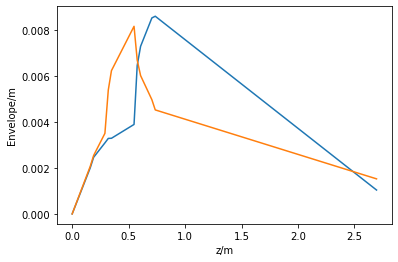

In [6]:
plt.plot(np_envelope[:,0], np_envelope[:,1])
plt.plot(np_envelope[:,0], np_envelope[:,2])
plt.xlabel("z/m")
plt.ylabel("Envelope/m")
plt.show()